## Wine Quality Analysis and Prediction

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


## Data Collection

In [2]:
# loading dataset in pandas dataframe
data = pd.read_csv('winequality-white.csv', sep = ';')


In [3]:
# Check first five rows of the dataset
data.head()


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [4]:
# Check last five rows of the dataset
data.tail()


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
4893     11.2        6  
4894      9.6        5  
4895      9.4        6  
4896     12.8        7  
4897     11.8        6

In [5]:
# Check shape of the dataset
data.shape


(4898, 12)

In [6]:
# Check infomation of the dataset
# Generally done to understand the data type of the dataset, because you might need to do conversions
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [7]:
# Check columns of the dataset
# It's a good idea to call data by column names
data.columns
# Dtype is object


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
data.describe()


fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

In [9]:
# Check correlation matrix of the dataset
data.corr()


fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.022697     0.289181   
volatile acidity          -0.022697          1.000000    -0.149472   
citric acid                0.289181         -0.149472     1.000000   
residual sugar             0.089021          0.064286     0.094212   
chlorides                  0.023086          0.070512     0.114364   
free sulfur dioxide       -0.049396         -0.097012     0.094077   
total sulfur dioxide       0.091070          0.089261     0.121131   
density                    0.265331          0.027114     0.149503   
pH                        -0.425858         -0.031915    -0.163748   
sulphates                 -0.017143         -0.035728     0.062331   
alcohol                   -0.120881          0.067718    -0.075729   
quality                   -0.113663         -0.194723    -0.009209   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.089021   0.023086            -0.049396   
volatile acidity            0.064286   0.070512            -0.097012   
citric acid                 0.094212   0.114364             0.094077   
residual sugar              1.000000   0.088685             0.299098   
chlorides                   0.088685   1.000000             0.101392   
free sulfur dioxide         0.299098   0.101392             1.000000   
total sulfur dioxide        0.401439   0.198910             0.615501   
density                     0.838966   0.257211             0.294210   
pH                         -0.194133  -0.090439            -0.000618   
sulphates                  -0.026664   0.016763             0.059217   
alcohol                    -0.450631  -0.360189            -0.250104   
quality                    -0.097577  -0.209934             0.008158   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                     0.091070  0.265331 -0.425858  -0.017143   
volatile acidity                  0.089261  0.027114 -0.031915  -0.035728   
citric acid                       0.121131  0.149503 -0.163748   0.062331   
residual sugar                    0.401439  0.838966 -0.194133  -0.026664   
chlorides                         0.198910  0.257211 -0.090439   0.016763   
free sulfur dioxide               0.615501  0.294210 -0.000618   0.059217   
total sulfur dioxide              1.000000  0.529881  0.002321   0.134562   
density                           0.529881  1.000000 -0.093591   0.074493   
pH                                0.002321 -0.093591  1.000000   0.155951   
sulphates                         0.134562  0.074493  0.155951   1.000000   
alcohol                          -0.448892 -0.780138  0.121432  -0.017433   
quality                          -0.174737 -0.307123  0.099427   0.053678   

                       alcohol   quality  
fixed acidity        -0.120881 -0.113663  
volatile acidity      0.067718 -0.194723  
citric acid          -0.075729 -0.009209  
residual sugar       -0.450631 -0.097577  
chlorides            -0.360189 -0.209934  
free sulfur dioxide  -0.250104  0.008158  
total sulfur dioxide -0.448892 -0.174737  
density              -0.780138 -0.307123  
pH                    0.121432  0.099427  
sulphates            -0.017433  0.053678  
alcohol               1.000000  0.435575  
quality               0.435575  1.000000

In [10]:
# Check missing values of the dataset
data.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
# Check duplicated values
data.duplicated().sum()


937

## EDA of The Dataset

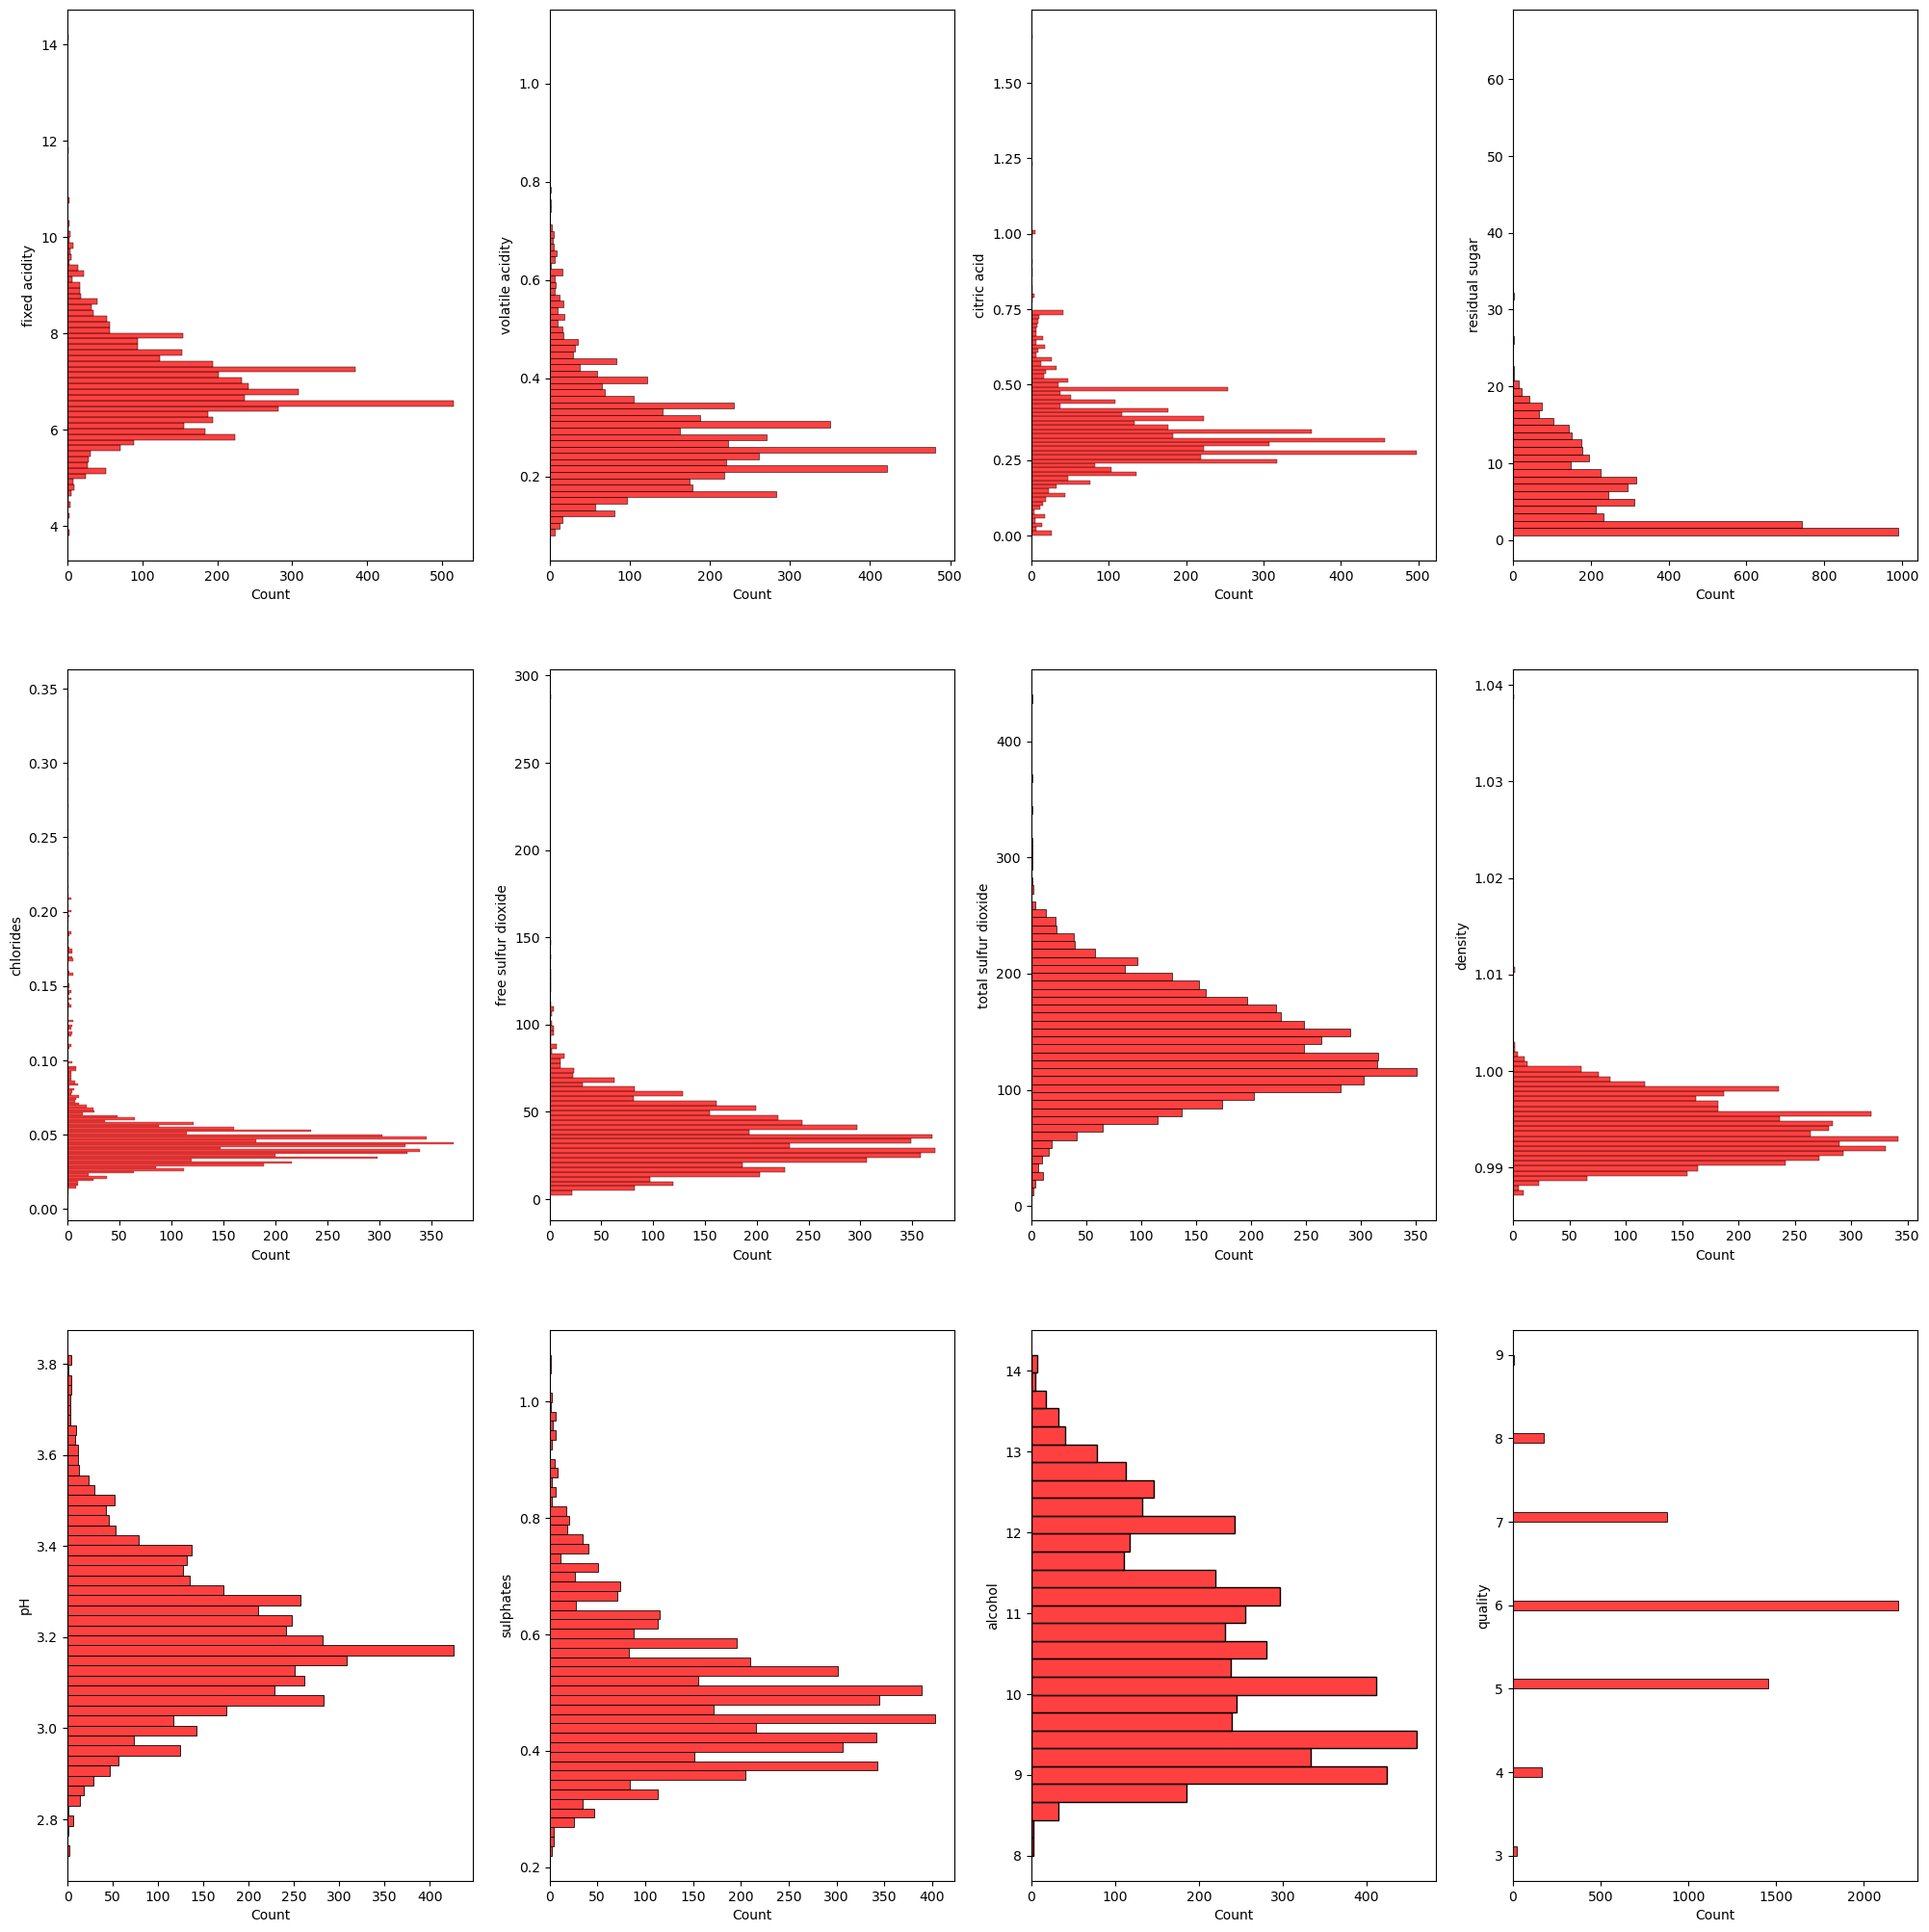

In [12]:
# Create histplot plots
fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(20,20))
index = 0
ax = ax.flatten()

for col, value in data.items():
    if col != 'type':
        sns.histplot(y=col, data=data, ax=ax[index], color="red")
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)


<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

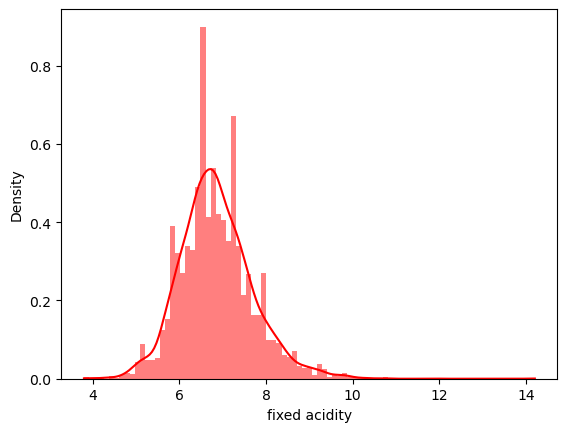

In [13]:
# Histplot for fixed acidity
sns.histplot(data['fixed acidity'], color="red", label="100% Equities", kde=True, stat="density", linewidth=0)


<AxesSubplot:xlabel='volatile acidity', ylabel='Density'>

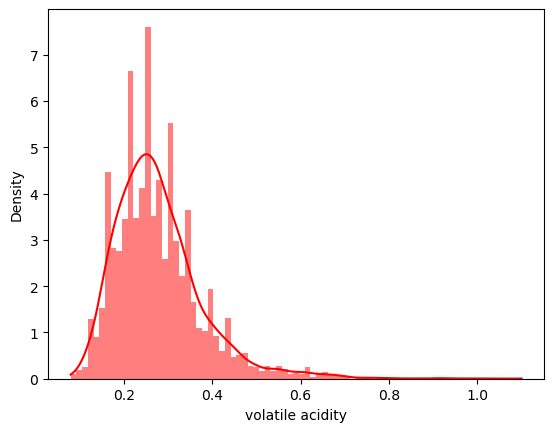

In [14]:
# Histplot for volatile acidity
sns.histplot(data['volatile acidity'], color="red", label="100% Equities", kde=True, stat="density", linewidth=0)


<AxesSubplot:xlabel='citric acid', ylabel='Density'>

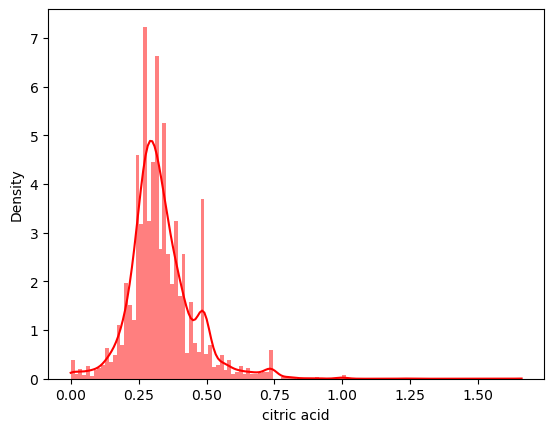

In [15]:
# Histplot for citric acid
sns.histplot(data['citric acid'], color="red", label="100% Equities", kde=True, stat="density", linewidth=0)


<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

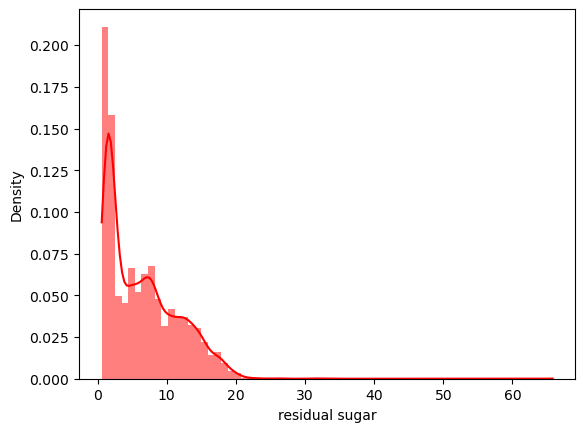

In [16]:
# Histplot for residual sugar
sns.histplot(data['residual sugar'], color="red", label="100% Equities", kde=True, stat="density", linewidth=0)


<AxesSubplot:xlabel='chlorides', ylabel='Density'>

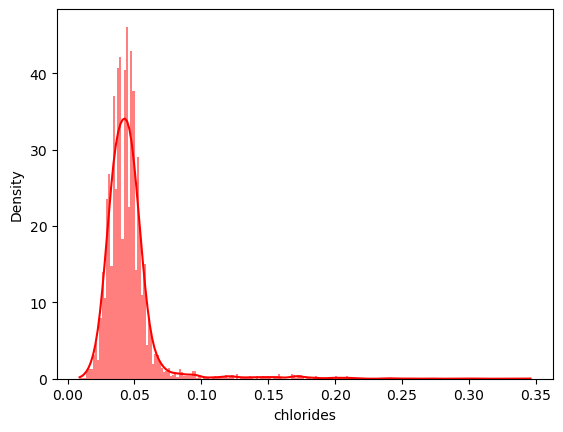

In [17]:
# Histplot for chlorides
sns.histplot(data['chlorides'], color="red", label="100% Equities", kde=True, stat="density", linewidth=0)


<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

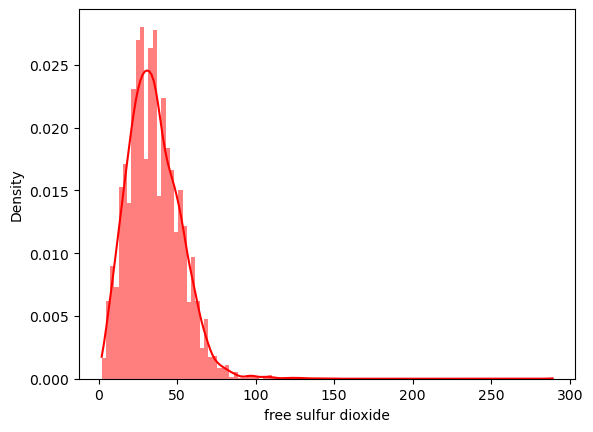

In [18]:
# Histplot for free sulfur dioxide
sns.histplot(data['free sulfur dioxide'], color="red", label="100% Equities", kde=True, stat="density", linewidth=0)


<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Density'>

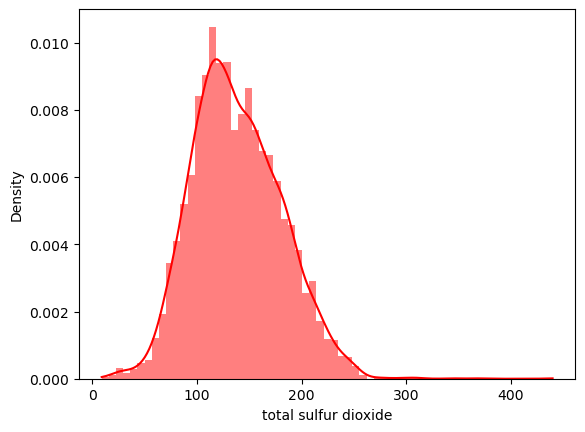

In [19]:
# Histplot for total sulfur dioxide
sns.histplot(data['total sulfur dioxide'], color="red", label="100% Equities", kde=True, stat="density", linewidth=0)


<AxesSubplot:xlabel='density', ylabel='Density'>

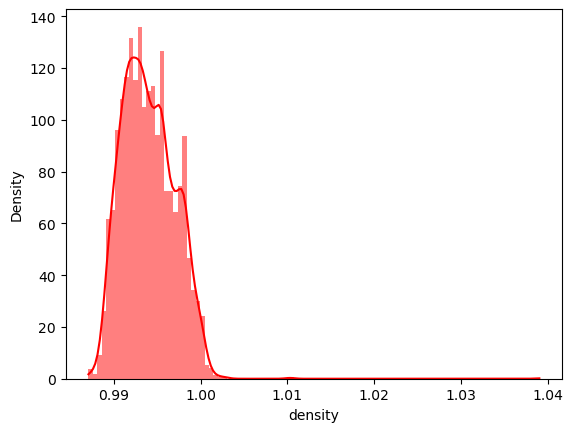

In [20]:
# Histplot for density
sns.histplot(data['density'], color="red", label="100% Equities", kde=True, stat="density", linewidth=0)


<AxesSubplot:xlabel='sulphates', ylabel='Density'>

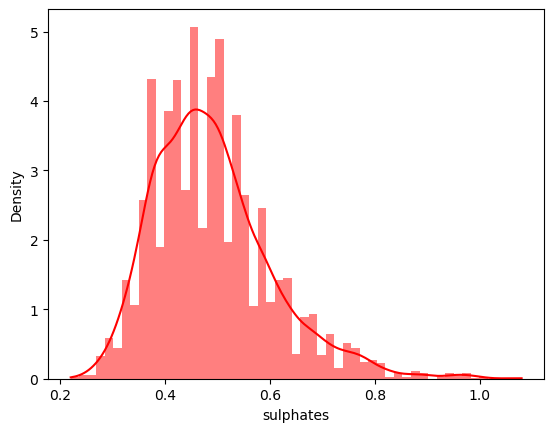

In [21]:
# Histplot for sulphates
sns.histplot(data['sulphates'], color="red", label="100% Equities", kde=True, stat="density", linewidth=0)


<AxesSubplot:xlabel='pH', ylabel='Density'>

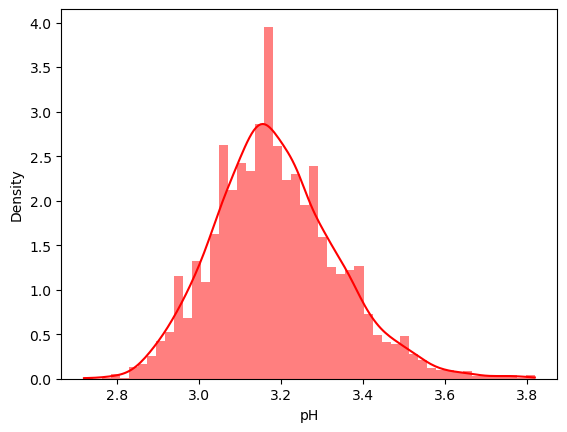

In [22]:
# Histplot for PH
sns.histplot(data['pH'], color="red", label="100% Equities", kde=True, stat="density", linewidth=0)


<AxesSubplot:xlabel='alcohol', ylabel='Density'>

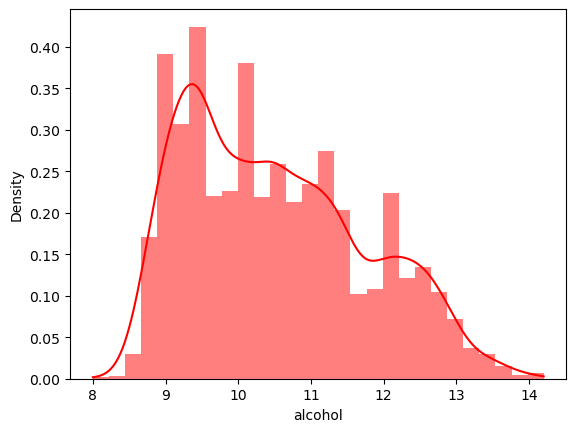

In [23]:
# Histplot for alcohol
sns.histplot(data['alcohol'], color="red", label="100% Equities", kde=True, stat="density", linewidth=0)


<AxesSubplot:xlabel='quality', ylabel='Density'>

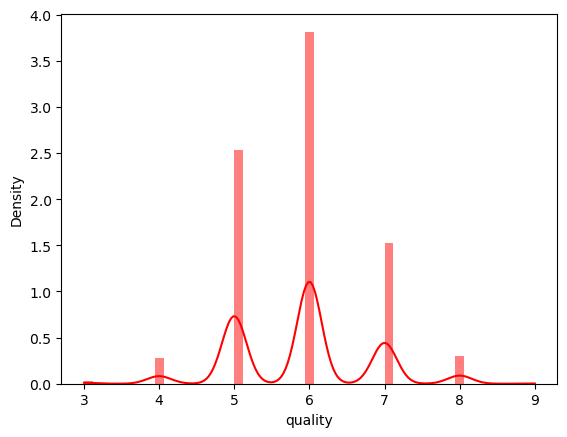

In [24]:
# Histplot for quality
sns.histplot(data['quality'], color="red", label="100% Equities", kde=True, stat="density", linewidth=0)


In [25]:
# Count the value quality
data['quality'].value_counts()


6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

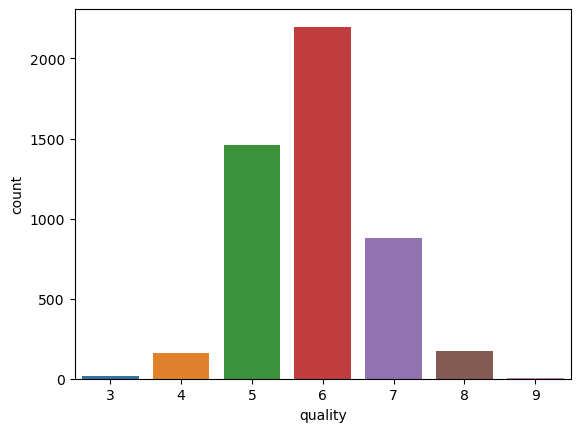

In [26]:
# Countplot value quality
sns.countplot(x ='quality', data = data)


<AxesSubplot:ylabel='quality'>

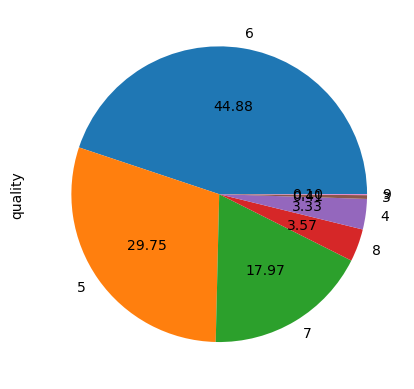

In [27]:
# Pie plot
palette_color = sns.color_palette('dark')
data['quality'].value_counts().plot(kind='pie',autopct='%.2f')


<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

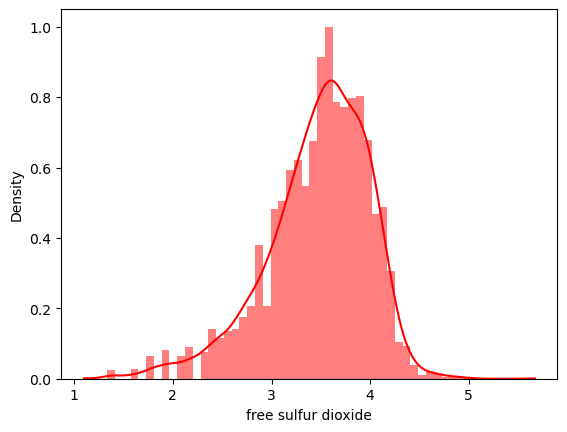

In [28]:
# log transformation
data['free sulfur dioxide'] = np.log(1 + data['free sulfur dioxide'])
sns.histplot(data['free sulfur dioxide'], color="red", label="100% Equities", kde=True, stat="density", linewidth=0)


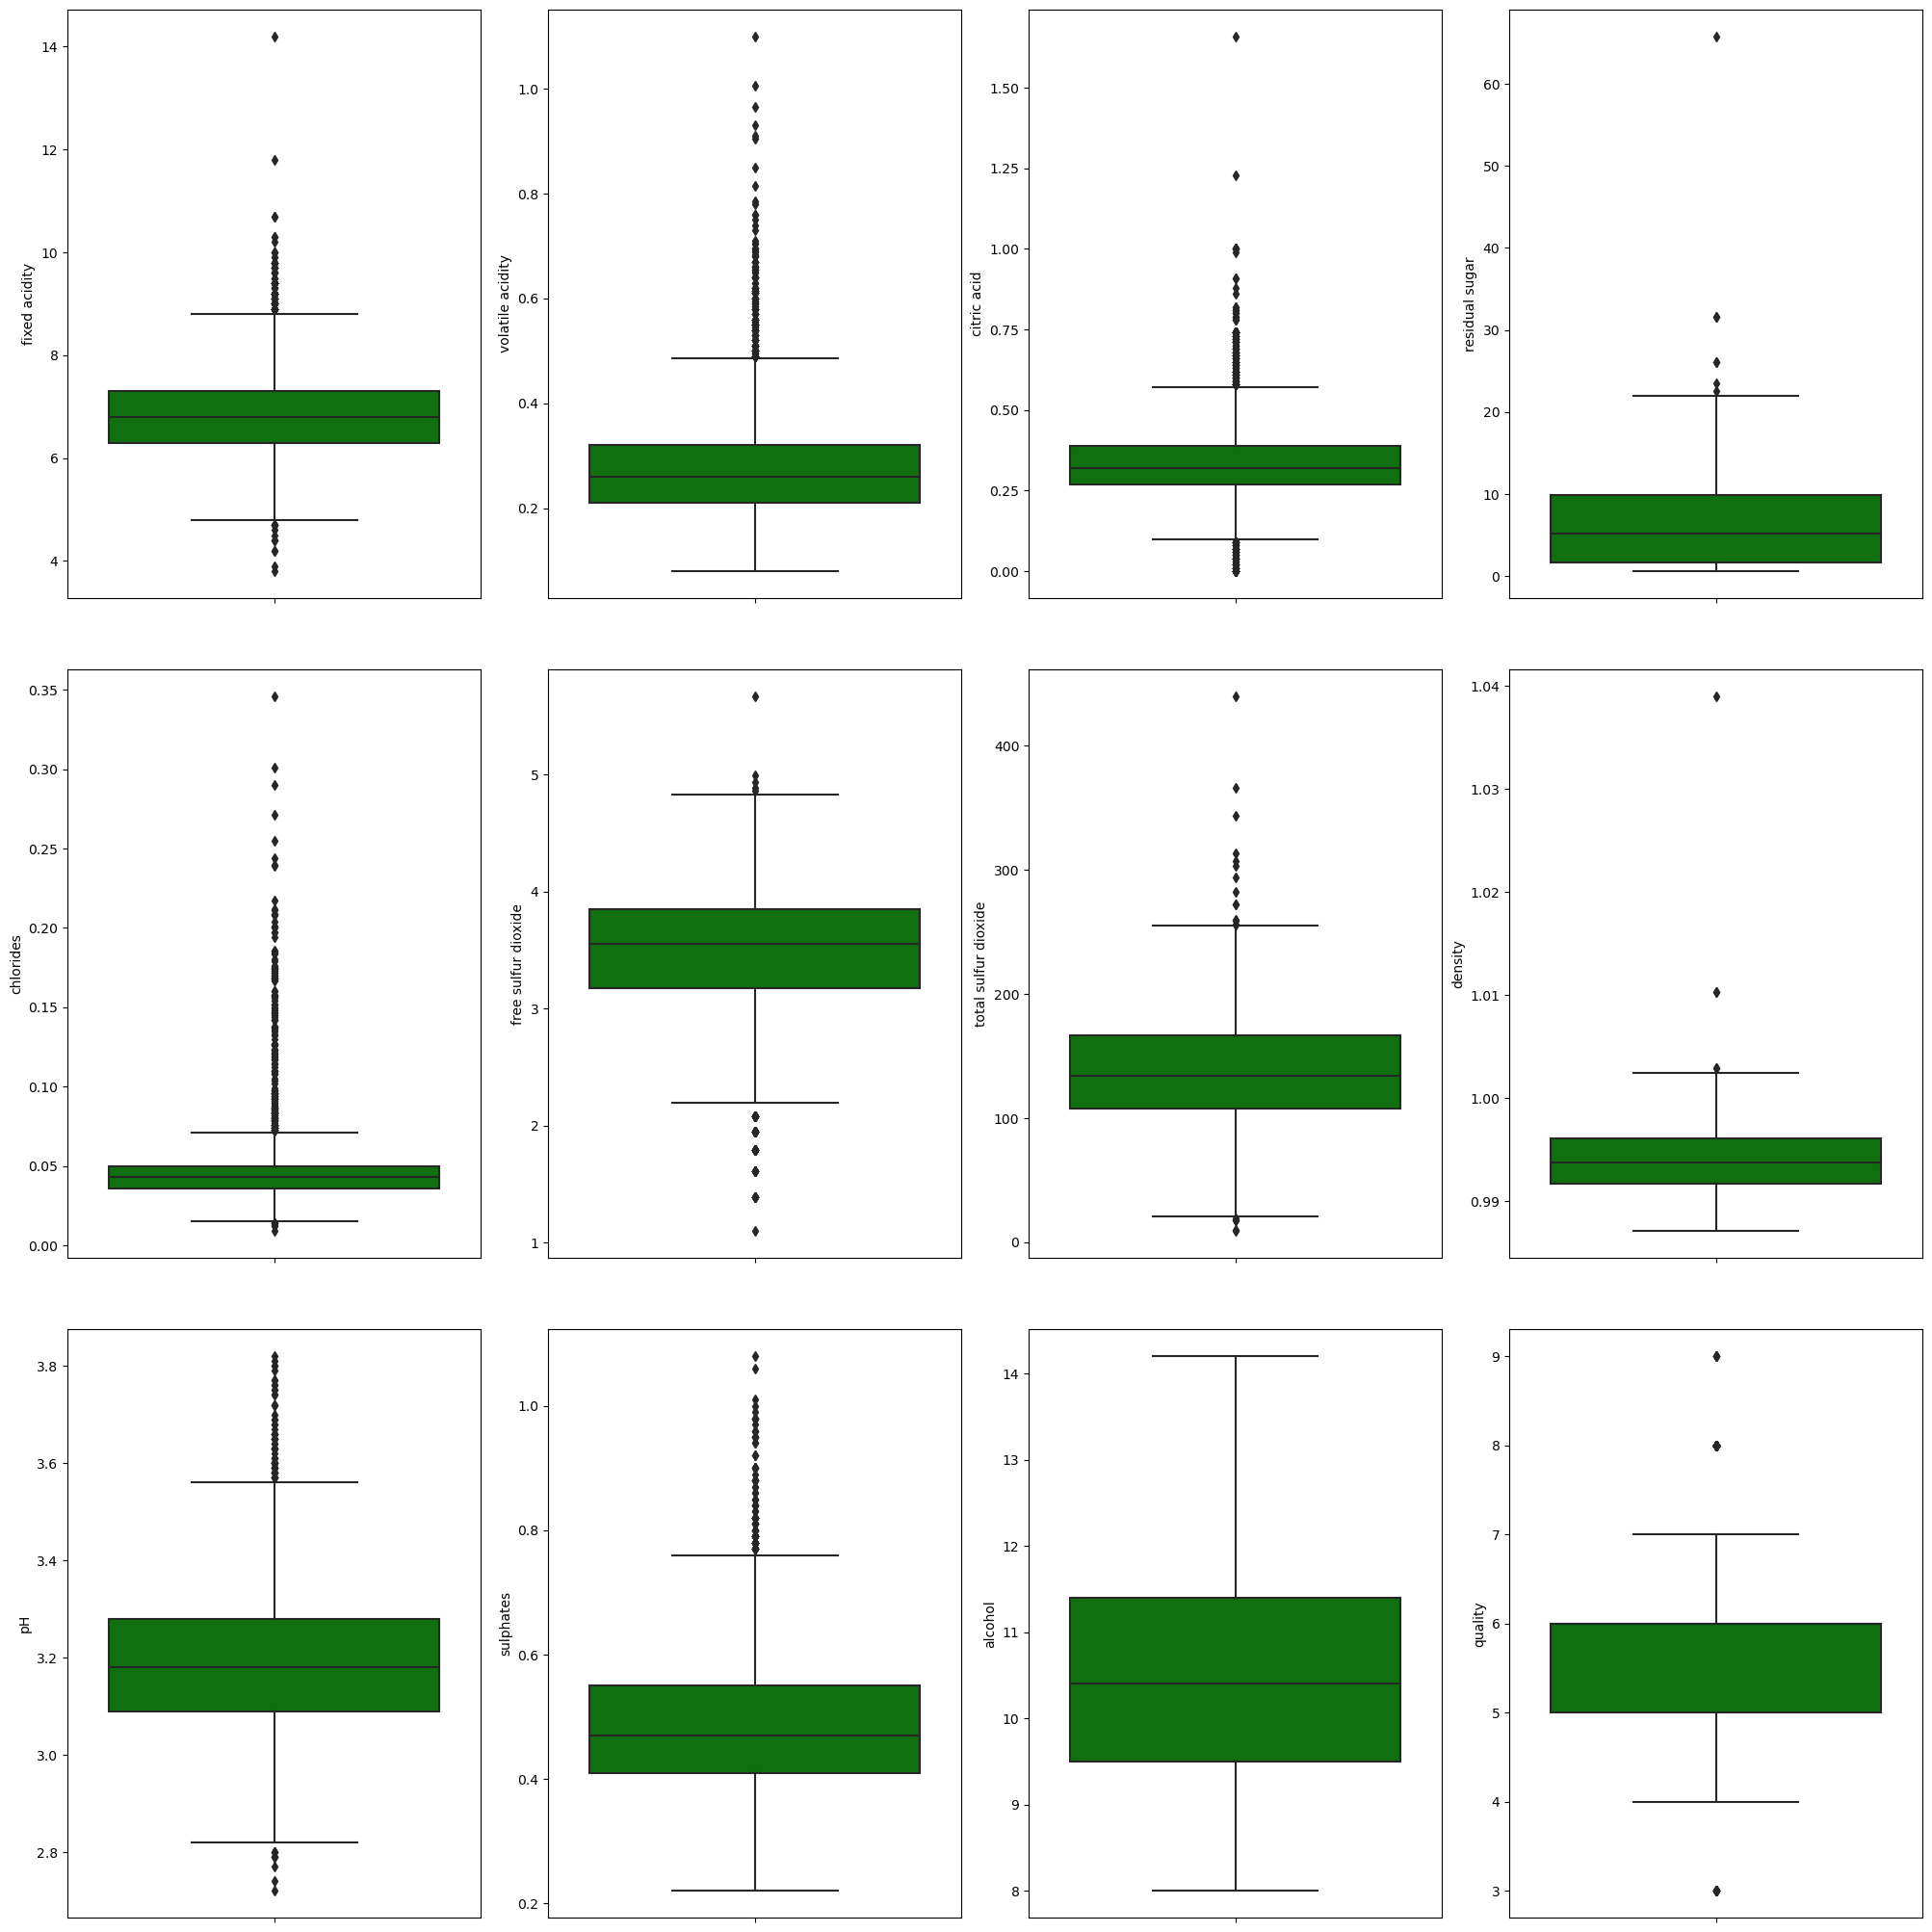

In [29]:
# Create box plots
fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(20,20))
index = 0
ax = ax.flatten()
for col, value in data.items():
    if col != 'type':
        sns.boxplot(y=col, data=data, ax=ax[index], color="green")
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)


<AxesSubplot:>

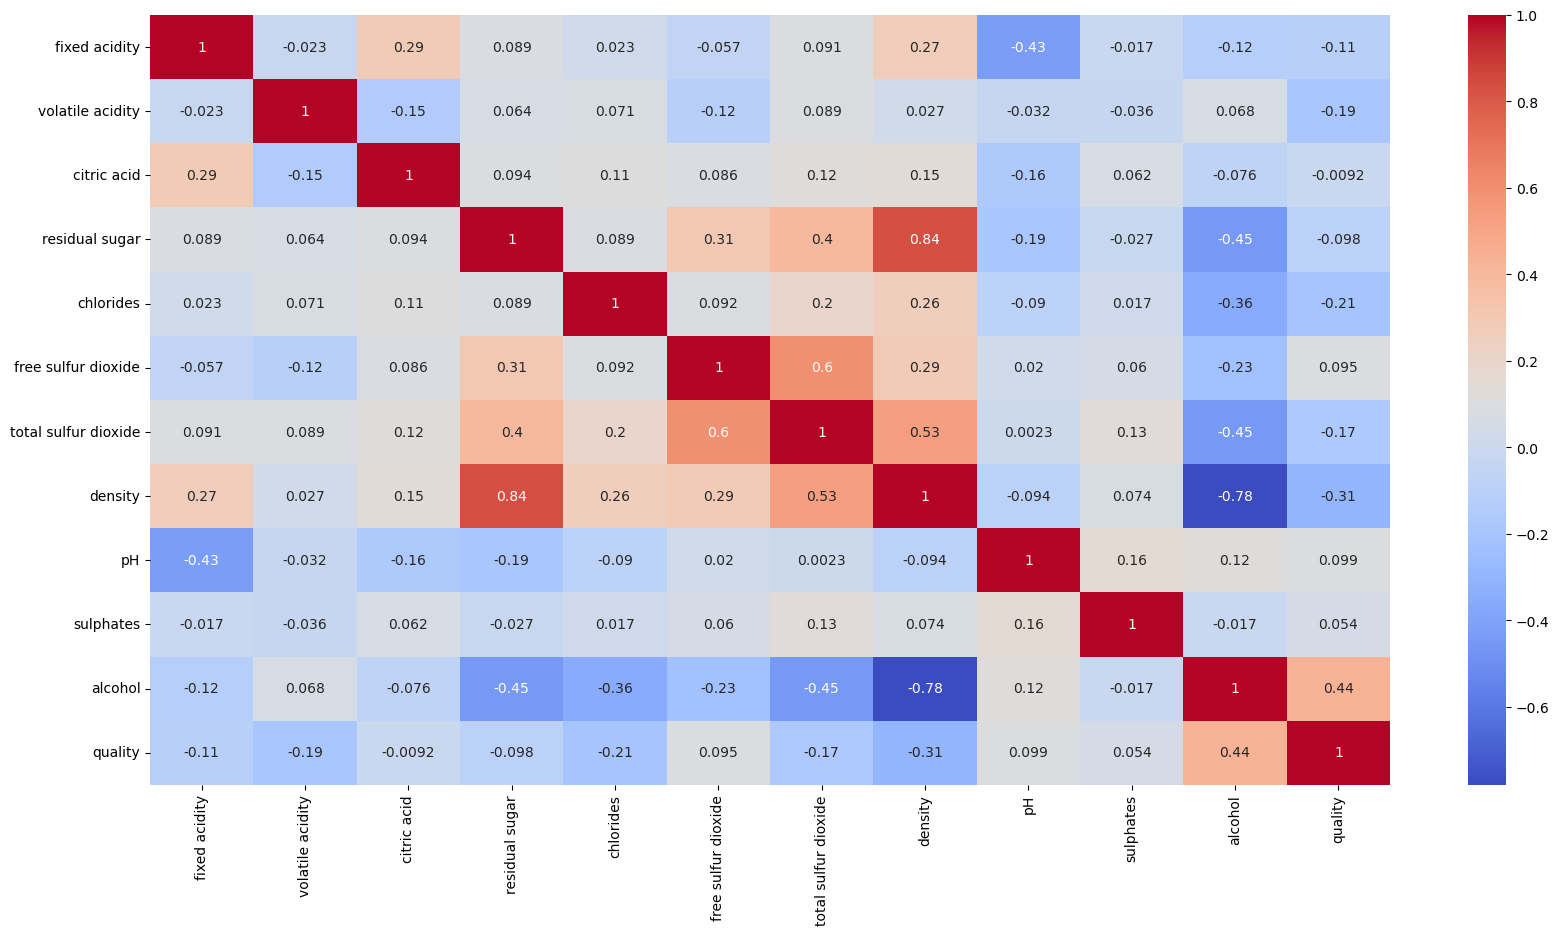

In [30]:
# Correlation matrix and heatmap of the dataset
corr = data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')


<AxesSubplot:>

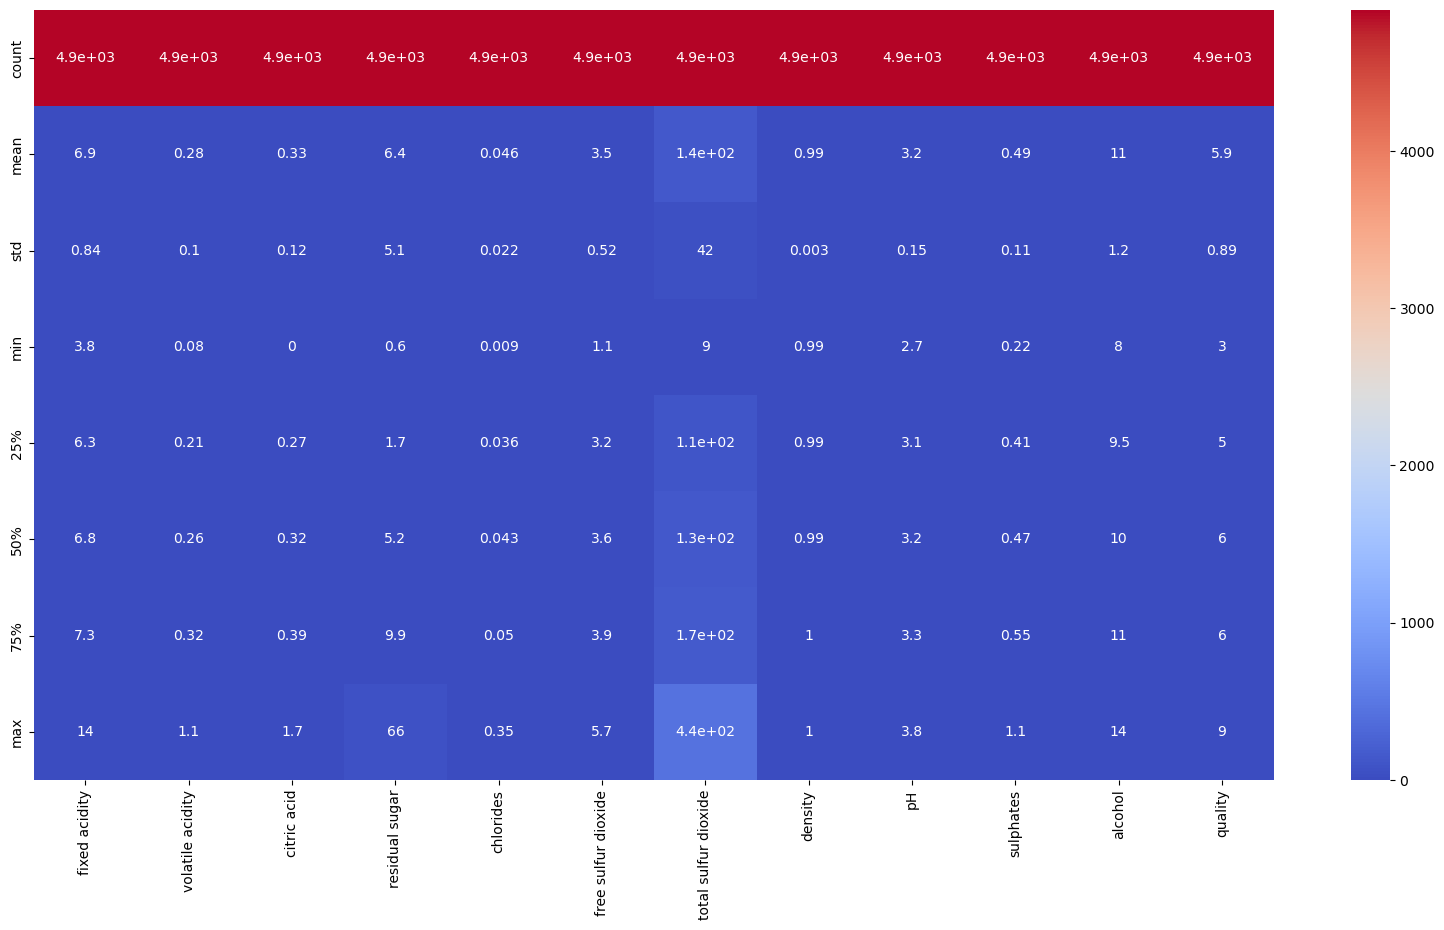

In [31]:
# Bit weird but okay
desc = data.describe()
plt.figure(figsize=(20,10))
sns.heatmap(desc, annot=True, cmap='coolwarm')


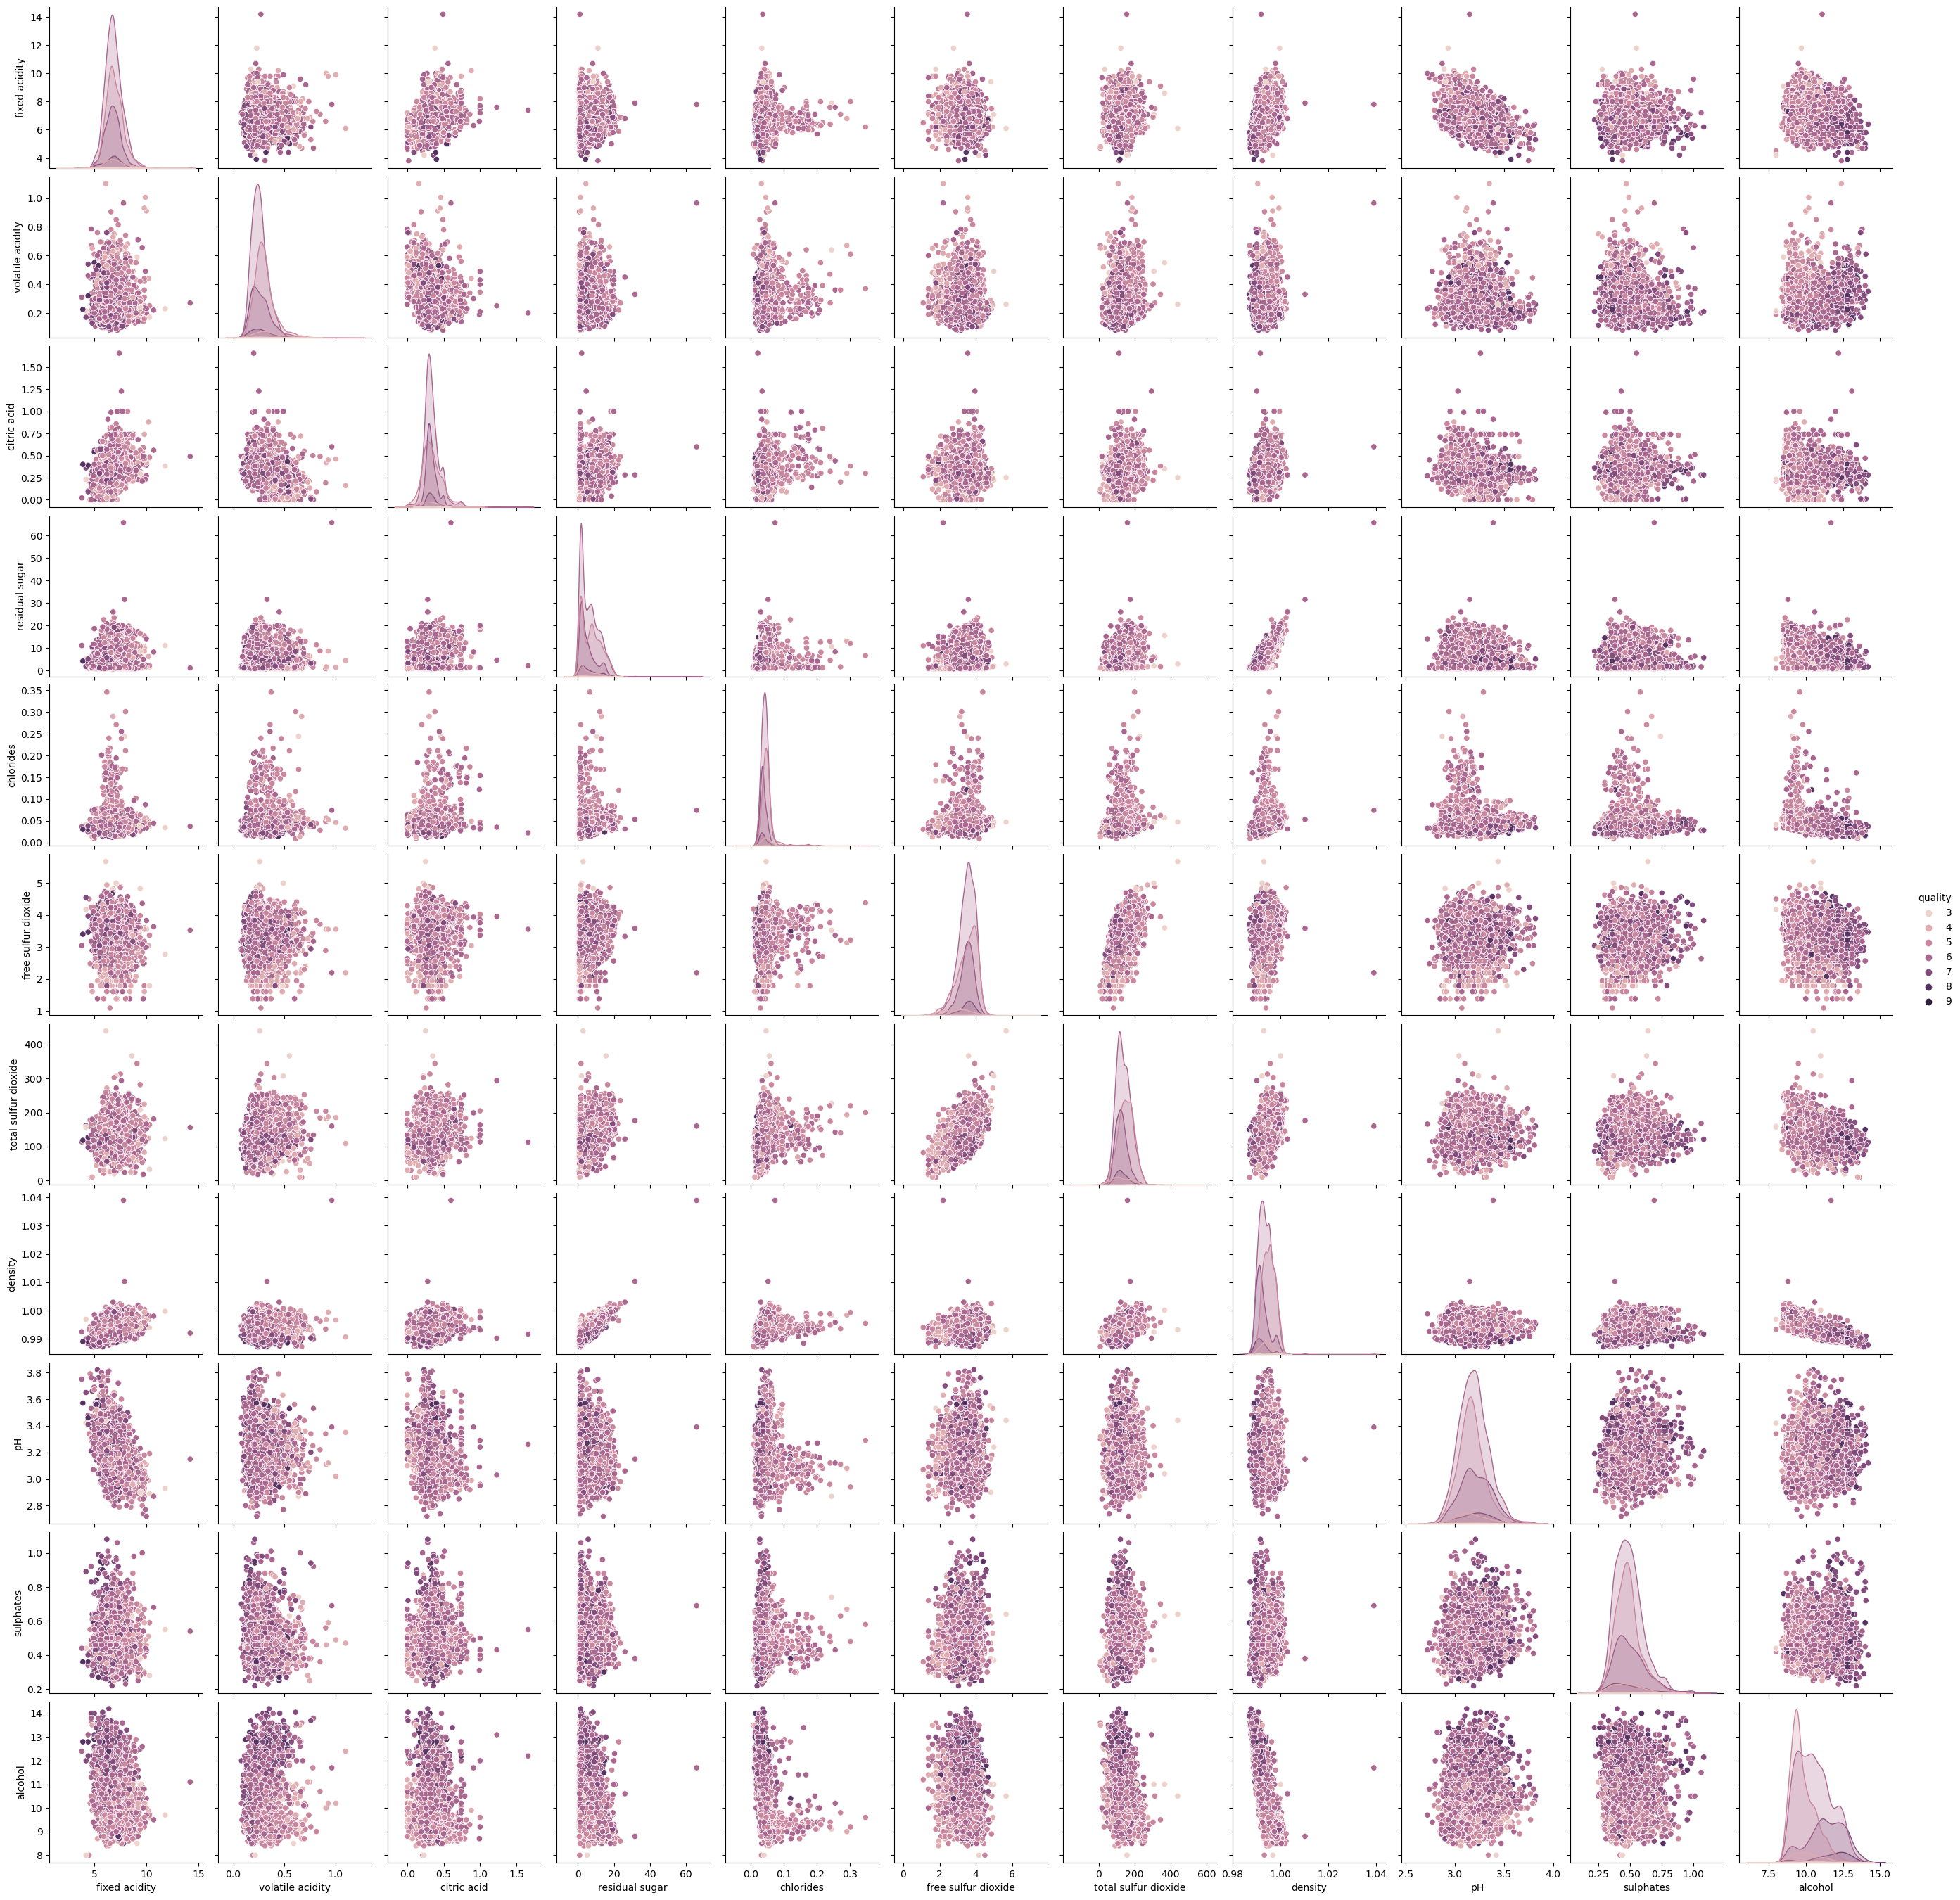

In [32]:
# Pairplot of the dataset
sns.pairplot(data,hue='quality')


In [33]:
# Fill the missing values
#for col, value in data.items():
#    if col != 'type':
#        data[col] = data[col].fillna(data[col].mean())


In [34]:
#spliting the dataset in X and Y
X = data.drop(columns=['quality'])
Y = data['quality']


In [35]:
X,Y

(      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0               7.0              0.27         0.36            20.7      0.045   
 1               6.3              0.30         0.34             1.6      0.049   
 2               8.1              0.28         0.40             6.9      0.050   
 3               7.2              0.23         0.32             8.5      0.058   
 4               7.2              0.23         0.32             8.5      0.058   
 ...             ...               ...          ...             ...        ...   
 4893            6.2              0.21         0.29             1.6      0.039   
 4894            6.6              0.32         0.36             8.0      0.047   
 4895            6.5              0.24         0.19             1.2      0.041   
 4896            5.5              0.29         0.30             1.1      0.022   
 4897            6.0              0.21         0.38             0.8      0.020   
 
       free su

In [36]:
Y.value_counts()


6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [37]:
# Oversampling to get better results
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)
# transform the dataset
X, Y = oversample.fit_resample(X, Y)


In [38]:
Y.value_counts()


6    2198
5    2198
7    2198
8    2198
4    2198
3    2198
9    2198
Name: quality, dtype: int64

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [40]:
# Split the data to train and test set
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.85)

# Print X_train and Y_train
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)


(13078, 11) (2308, 11) (13078,) (2308,)


In [41]:
# Using Standard-scaler
scaler = StandardScaler()
X_train =scaler.fit_transform(X_train)


In [42]:
import warnings
warnings.filterwarnings('ignore')

In [43]:
# Classify function
from sklearn.model_selection import cross_val_score, train_test_split

def classify(model, X_train, Y_train):
    # train the model
    model.fit(X_train, Y_train)
    print("Accuracy:", model.score(X_test, Y_test) * 100)

    # cross-validation
    score = cross_val_score(model, X_train, Y_train, cv=5)
    print("CV Score:", np.mean(score)*100)


In [44]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
classify(model, X_train, Y_train)


Accuracy: 12.91161178509532
CV Score: 53.1121528935043


In [45]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
classify(model, X_train, Y_train)


Accuracy: 14.211438474870016
CV Score: 79.63754451207747


In [46]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
classify(model, X_train, Y_train)


Accuracy: 12.868284228769497
CV Score: 87.97219347331612


In [47]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
classify(model, X_train, Y_train)


Accuracy: 14.254766031195839
CV Score: 88.82096935464065


In [ ]:
from sklearn.svm import SVC

model = SVC()
classify(model, X_train, Y_train)

Accuracy: 13.908145580589254


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
classify(model, X_train, Y_train)